# 특성 공학과 규제
## 다중 회귀, 특성 공학, 릿지, 라쏘, 하이퍼파라미터
여러 특성을 사용한 다중 회귀에 대해 배우고 사이킷런의 여러 도구를 사용해 보기. 복잡한 모델의 과대적합을 막기 위한 릿지와 라쏘 회귀 배우기

## 다중 회귀
하나의 특성이 아닌 여러 개의 특성을 사용한 선형 회귀

    하나의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선
    특성이 2개면 선형 회귀는 평면을 학습
    
📍선형 회귀는 특성이 많은 고차원에서 복잡한 모델 표현이 가능하기 때문에 직선이나 평면으로 생각해 성능이 무조건 낮다고 오해는 금물

📍 다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같은데, 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것!

### 특성 공학(feature engineering)

    기존의 특성을 사용해 새로운 특성을 뽑아내는 작업 - 주어진 특성을 조합하여 새로운 특성을 만드는 일련의 작업 과정
- 농어의 길이 + 높이, 두께도 함께 사용하고, 3개의 특성을 각각 제곱해서 추가한다.
- 또한 각 특성을 서로 곱해서 또 다른 특성을 만든다
    - 농어 길이 X 농어 높이 를 새로운 특성으로 만드는 것.

## 데이터 준비
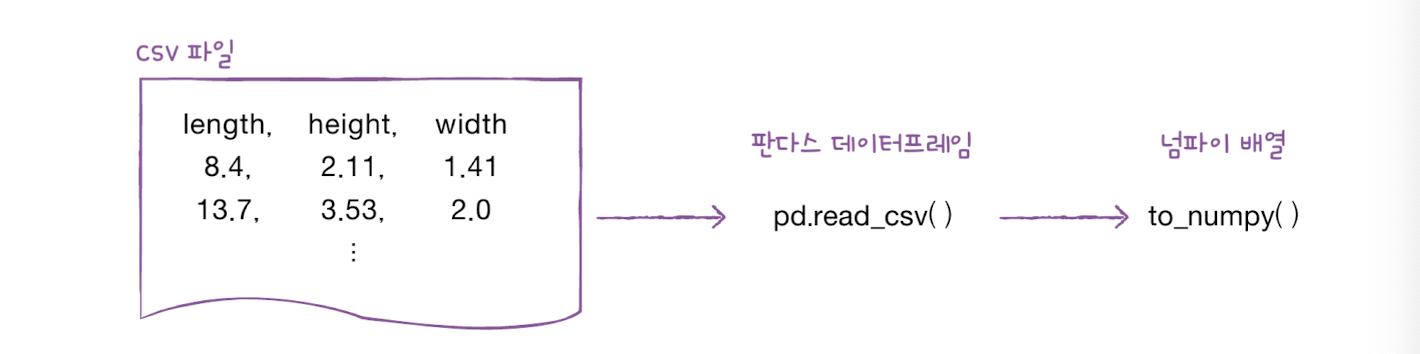

In [1]:
import pandas as pd 
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )


In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기
사이킷런에서 특성을 만들거나 전처리하는 클래스를 변환기라고 부른다.

- 사이킷런의 모델 클래스에는
    - 일관된 fit(), score(), predict() 메서드가 있다
- 사이킷런의 변환기 클래스에는
    - 일관된 fit(), transform() 메서드가 있다. 
+) 선형 회귀같은 사이킷런의 모델 클래스는 추정기라고도 부른다. 

❓transform 전에 꼭 poly.fit을 사용해야 하나?

❗️훈련을 해야 변환이 가능하다

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# 2개의 특성 2와 3으로 이루어진 샘플 하나 적용
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


1. fit() : 새롭게 만들 특성 조합 찾기
2. transform() : 실제로 데이터 변환

변환기는 타깃 데이터 없이 입력 데이터를 변환하기 때문에 모델 클래스와는 다르게 타깃 데이터가 필요하지 않다. 

📍여기에는 2개의 특성(원소)를 가진 샘플 `[2, 3]`이 6개의 특성을 가진 샘플 `[1. 2. 3. 4. 6. 9]`로 바뀌었다.

📍 PolynomialFeatures클래스는 기본적으로 

1. 각 특성을 제곱한 항을 추가 : `2*2`, `3*3` ; `4 9`
2. 특성끼리 곱한 값 추가 : 2*3 ; 6

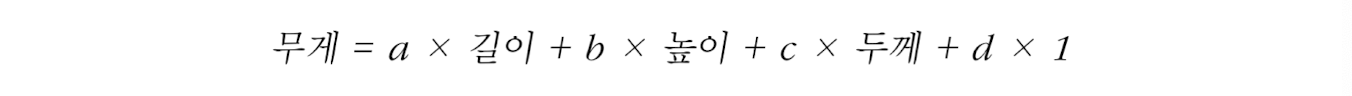

선형 방정식의 절편 : 항상 값이 1인 특성과 곱해지는 계수 ( 1 X d)

💡 특성 = (길이, 높이, 두께, 1)

하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하기 때문에, 굳이 1 특성을 만들 필요는 없다. include_bias = False로 지정하여 특성을 변환하기!

In [11]:
# include_bias=False
# 절편을 위한 항이 제거됨
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [14]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [16]:
# get_feature_names_out()로 9개의 특성이 각각 어떤 입력의 조합인지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [17]:
test_poly = poly.transform(test_input)

❓ 훈련 세트에 적용했던 변환기로 테스트 세트를 변환해야 할까?

❗️ PolynomialFeatures 는 fit()에서 만들 특성의 조합을 준비하기만 하고 별도의 통계 값을 구하지 않았으므로 테스트 세트를 따로 변환해도 되지만, 항상 훈련 세트를 기준으로 테스트 세트를 변환하는 습관을 들이는 것이 중요하다. 

## 다중 회귀 모델 훈련하기
다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같지만, 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것! 

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [19]:
print(lr.score(train_poly, train_target))

0.9903183436982125


- 농어의 길이뿐만 아니라 높이와 두께를 모두 사용
- 특성을 제곱하거나 서로 곱해서 다항 특성을 추가

📍특성이 늘어나면 선형 회귀 능력이 매우 강하다는 것을 알 수 있다!

In [20]:
print(lr.score(test_poly, test_target))

0.9714559911594159


테스트 세트에 대한 점수는 높아지지 않았지만 과소적합 문제는 해결!

### degree 매개변수
📌 특성을 더 많이 추가한다면?

고차항의 최대 차수를 지정할 수 있다.

In [21]:
# 5제곱까지 특성을 만들어 출력
poly = PolynomialFeatures(degree=5, include_bias=False)

# 특성 조합 찾기
poly.fit(train_input)

# 실제 데이터로 변환
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [22]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.999999999999769


In [23]:
print(lr.score(test_poly, test_target))

-144.40490595353674


특성의 개수를 크게 늘리면 선형 모델은 강력해져 훈련 세트에 대해 거의 완벽하게 학습할 수 있다. 이런 모델은 훈련 세트에 너무 과대적합되므로 테스트 세트에서 점수가 낮을 수 있다. 

📍샘플 개수보다 특성이 많으면 ..? 완벽하게 학습할 수 있는 것은 당연하다. 55번이나 쏠 수 있다면 42개의 참새 맞추는건 너무나 쉬움

이 문제를 해결하기 위해서는 특성을 줄어야하지만, 또 다른 방법이 있다.

## 규제 (Regularization)
머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것

= 모델이 훈련 세트에 과대적합되지 않도록 만드는 것

💡선형회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 것

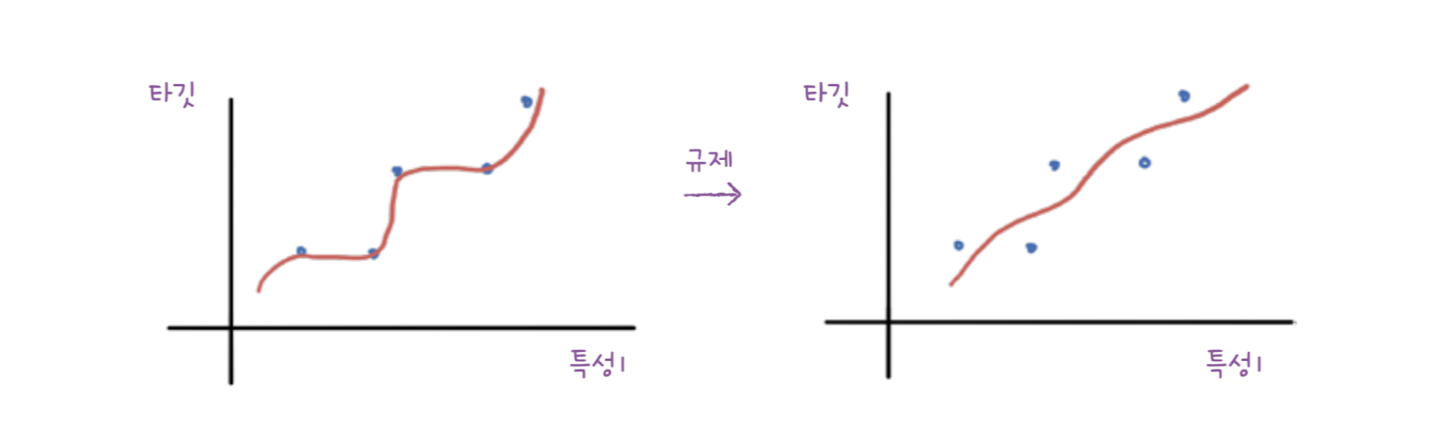

왼쪽은 훈련 세트를 과도하게 학습했고, 오른쪽은 기울기를 줄여 보편적인 패턴 학습

일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 다르면 안되니까 규제를 적용하기 전에 정규화를 해야한다. 

직접 표준점수를 구하는 방법도 있지만, 사이킷런의 StandardScaler 클래스를 사용하기

StandardScaler클래스 객체의
- mean_ : 학습한 평균
- scale_ : 학습한 표준편차 

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)

# 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

📌 선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 한다. 
- 릿지 : 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘 : 계수의 절댓값을 기준으로 규제를 적용

일반적으로 릿지를 조금 더 선호한다. 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다. 

## 릿지 회귀 (Ridge Regression)

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


선형 회귀에서 완벽에 가까웠던 점수가 낮아졌다. 

In [28]:
print(ridge.score(test_scaled, test_target))

0.9790693977615388


많은 특성을 사용했음에도 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있다. 

### alpha : 하이퍼파라미터
릿지와 라쏘 모델 사용할 때 규제의 강도를 조절

- alpha값이 커지면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.

- alpha값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다

### 하이퍼파라미터(hyperparameter)
머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터. 

    모델이 학습하는 값이 아니라 사전에 지정해야 하는 값

e.g. alpha값

📍머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현된다. 

<표기>
- 매개변수 : 함수와 클래스의  파라미터
- 파라미터 : 모델과 관련된 파라미터(모델 파라미터, 하이퍼파라미트)

적절한 alpha값을 찾는 방법은 alpha값에 대한 상관계수 그래프 그려보기

📍훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha값!

In [46]:
# alpha값을 바꿀 때마다 score()에 결과를 저장할 리스트 만들기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [47]:
# alpha 값을 0.001에서 100까지 10배씩 늘려가면서 릿지 회귀 모델을 훈련
# 훈련 세트와 테스트 세트 점수를 파이썬 리스트에 저장

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만들기
    ridge = Ridge(alpha=alpha)
    # 훈련
    ridge.fit(train_scaled, train_target)
    
    # 훈련 세트와 테스트 세트의 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

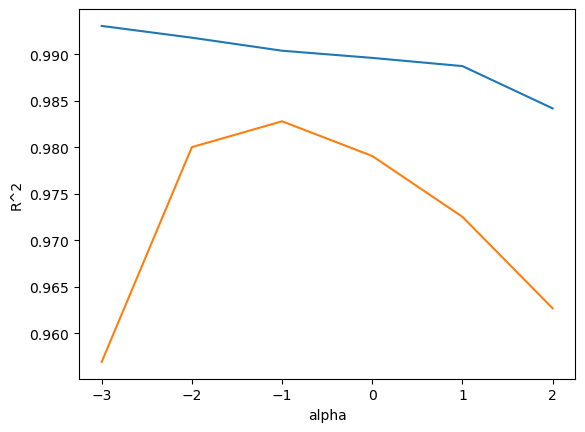

In [48]:
# 그래프 그려보기 
# alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해
# 로그 함수로 바꾸어 지수로 표현
# 넘파이 로그 함수는 np.log()를 이용해 값을 변경할 수 있다. 
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위는 훈련 세트, 아래는 테스트 세트 그래프인데 
- 그래프의 왼쪽 : 훈련 세트와 테스트 세트의 점수 차이가 크다
- 그래프의 오른쪽 : 훈련 세트와 테스트 세트의 점수가 모두 낮아지는 과소적합으로 가는 모습

📍 적절한 alpha 값은 두 그래프가 가장 가깝고, 테스트 세트의 점수가 가장 높은 -1 즉 0.1이다. alpha값을 0.1로 하여 최종 모델을 훈련!

In [50]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386955


## 라쏘 회귀 (Lasso Regression)
라쏘 모델을 훈련하는 것은 릿지와 매우 비슷하다. Ridge클래스를 Lasso로 바꿔 주면 된다.

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


0.9999 이랬는데 라쏘도 과대적합이 잘 억제되었고, 테스트 세트의 점수도 릿지만큼 좋다. 라쏘 모델도 alpha 매개변수로 규제의 강도를 조절할 수 있다. 

In [60]:
from sklearn.linear_model import Lasso

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    # 모델 훈련
    lasso.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


라쏘 모델을 훈련할 때 위의 오류가 발생할 수 있는데, 사이킷런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족한 경우 해당 경고가 발생한다. 반복 횟수를 충분히 늘리기 위해 max_iter 맴개변수의 값을 10000으로 지정했다. 필요하면 더 늘릴 수는 있지만 해당 문제에서는 큰 영향을 끼치지 않는다.

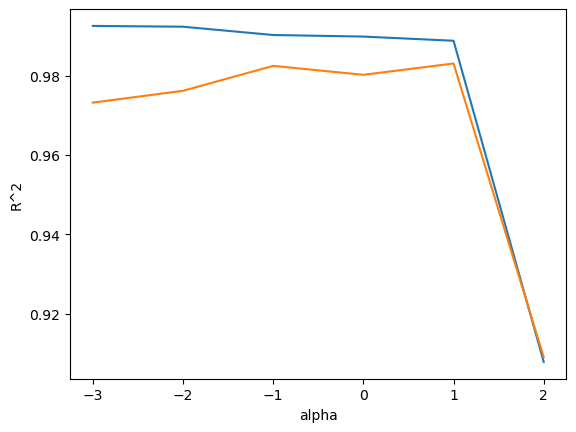

In [61]:
# 해당 리스트를 사용해 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- 왼쪽 : 과대적합
- 오른쪽 : 훈련 세트와 테스트 세트의 점수가 좁혀지고 있다. 

가장 오른족은 아주 크게 점수가 떨어진다. 이 지점은 과소적합되는 모델이다. 

📍라쏘 모델에서 최적의 alpha값은 1 즉 10이다. 이 값으로 다시 모델 훈련하기 

In [64]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


릿지와 마찬가지로 라쏘 모델이 과대적합을 잘 억제하고 테스트 성능을 크게 높인 것을 확인할 수 있다. 

라쏘 모델은 계수 값을 아예 0으로 만들 수 있는데, 라쏘 모델의 계수는 coef_ 속성에 저장되어 있다. 이 중에 0인 것을 헤아려 보기!

In [66]:
print(np.sum(lasso.coef_ == 0))

40


55개의 특성을 모델에 주입했지만, 라쏘 모델이 사용한 특성은 15개밖에 되지 않았다. 

📍이런 특징으로 인해 라쏘 모델을 유용한 특성을 골라내는 용도로 사용이 가능하다

## 핵심 패키지와 함수
### PolynomialFeatures 
주어진 특성을 조합하여 새로운 특성을 만든다.
- degree : 최고 차수 결정. 기본값 2
- interaction_only = True : 거듭제곱 항은 제외되고 특성 간의 곱셈 항만 추가된다. 기본값은 False
- include_bias = False : 절편을 위한 특성을 추가하지 않는다. 기본값은 True
### Ridge
규제가 있는 회귀 알고리즘인 릿지 회귀 모델을 훈련
- alpha 매개변수로 규제의 강도를 조절하는데, alpha값이 클수록 규제가 세진다. 기본값은 1
- solver 매개변수 : 최적의 모델을 찾기 위한 방법을 지정할 수 있다. 
    - 기본값은 auto
    - 데이터에 따라 자동으로 선택된다.
### Lasso
규제가 있는 회귀 알고리즘인 라쏘 회귀 모델을 훈련
- 최적화 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 좌표 하강법(coordinate descent)을 사용한다. 
- max_iter : 알고리즘의 수행 반복 횟수를 지정한다. 기본값은 1000